In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from keras.layers import Dense, Input
from keras.models import Model

In [9]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
onehot_enc = OneHotEncoder(sparse=False)
X = df.drop("label", axis=1).values / 255
y = onehot_enc.fit_transform(df["label"].values.reshape(-1, 1))

/home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
    test_size=0.14, random_state=42)

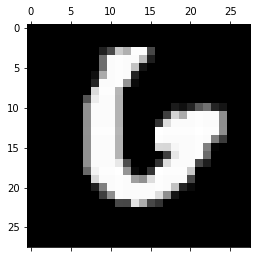

In [12]:
plt.matshow(X_train[5].reshape(28, 28), cmap="gray")
plt.show()

In [13]:
inputs = Input(shape=(784,))
encoding = Dense(256, activation="relu")(inputs)
encoding = Dense(128, activation="relu")(encoding)
encoding = Dense(64, activation="relu")(encoding)

decoding = Dense(128, activation="relu")(encoding)
decoding = Dense(256, activation="relu")(decoding)
outputs = Dense(784, activation="sigmoid")(decoding)

autoencoder = Model(inputs=inputs, outputs=outputs)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_23 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_24 (Dense)             (None, 784)               201488    
Total para

In [14]:
encoder = Model(inputs=inputs, outputs=encoding)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________


In [37]:
autoencoder.compile(loss="mse", optimizer="adam")

In [38]:
autoencoder.fit(X_train, X_train, batch_size=128, epochs=40)

Epoch 1/40
60199/60199 [==============================] - 3s 43us/step - loss: 0.0281
Epoch 2/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0135
Epoch 3/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0110
Epoch 4/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0096
Epoch 5/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0087
Epoch 6/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0080
Epoch 7/40
60199/60199 [==============================] - 2s 38us/step - loss: 0.0074
Epoch 8/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0069
Epoch 9/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0066
Epoch 10/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0062
Epoch 11/40
60199/60199 [==============================] - 2s 37us/step - loss: 0.0060
Epoch 12/40
60199/60199 [===========================

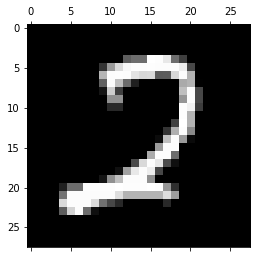

In [42]:
plt.matshow(X_test[450].reshape(28, 28), cmap="gray")

In [43]:
test = autoencoder.predict(X_test[450].reshape(1, -1))

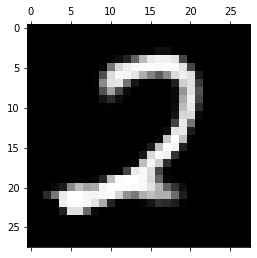

In [44]:
plt.matshow(test.reshape(28, 28), cmap="gray")

In [45]:
X_train_transformed = encoder.predict(X_train)
X_test_transformed = encoder.predict(X_test)

In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_transformed, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
predictions = knn_model.predict(X_test_transformed)
predictions = onehot_enc.inverse_transform(predictions)
y_test = onehot_enc.inverse_transform(y_test)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       967
         1.0       0.97      0.99      0.98      1129
         2.0       0.98      0.97      0.98       950
         3.0       0.97      0.96      0.96      1018
         4.0       0.99      0.97      0.98       885
         5.0       0.98      0.96      0.97       914
         6.0       0.99      0.99      0.99       946
         7.0       0.98      0.97      0.97      1031
         8.0       0.98      0.93      0.96       950
         9.0       0.96      0.97      0.96      1011

    accuracy                           0.97      9801
   macro avg       0.97      0.97      0.97      9801
weighted avg       0.97      0.97      0.97      9801

